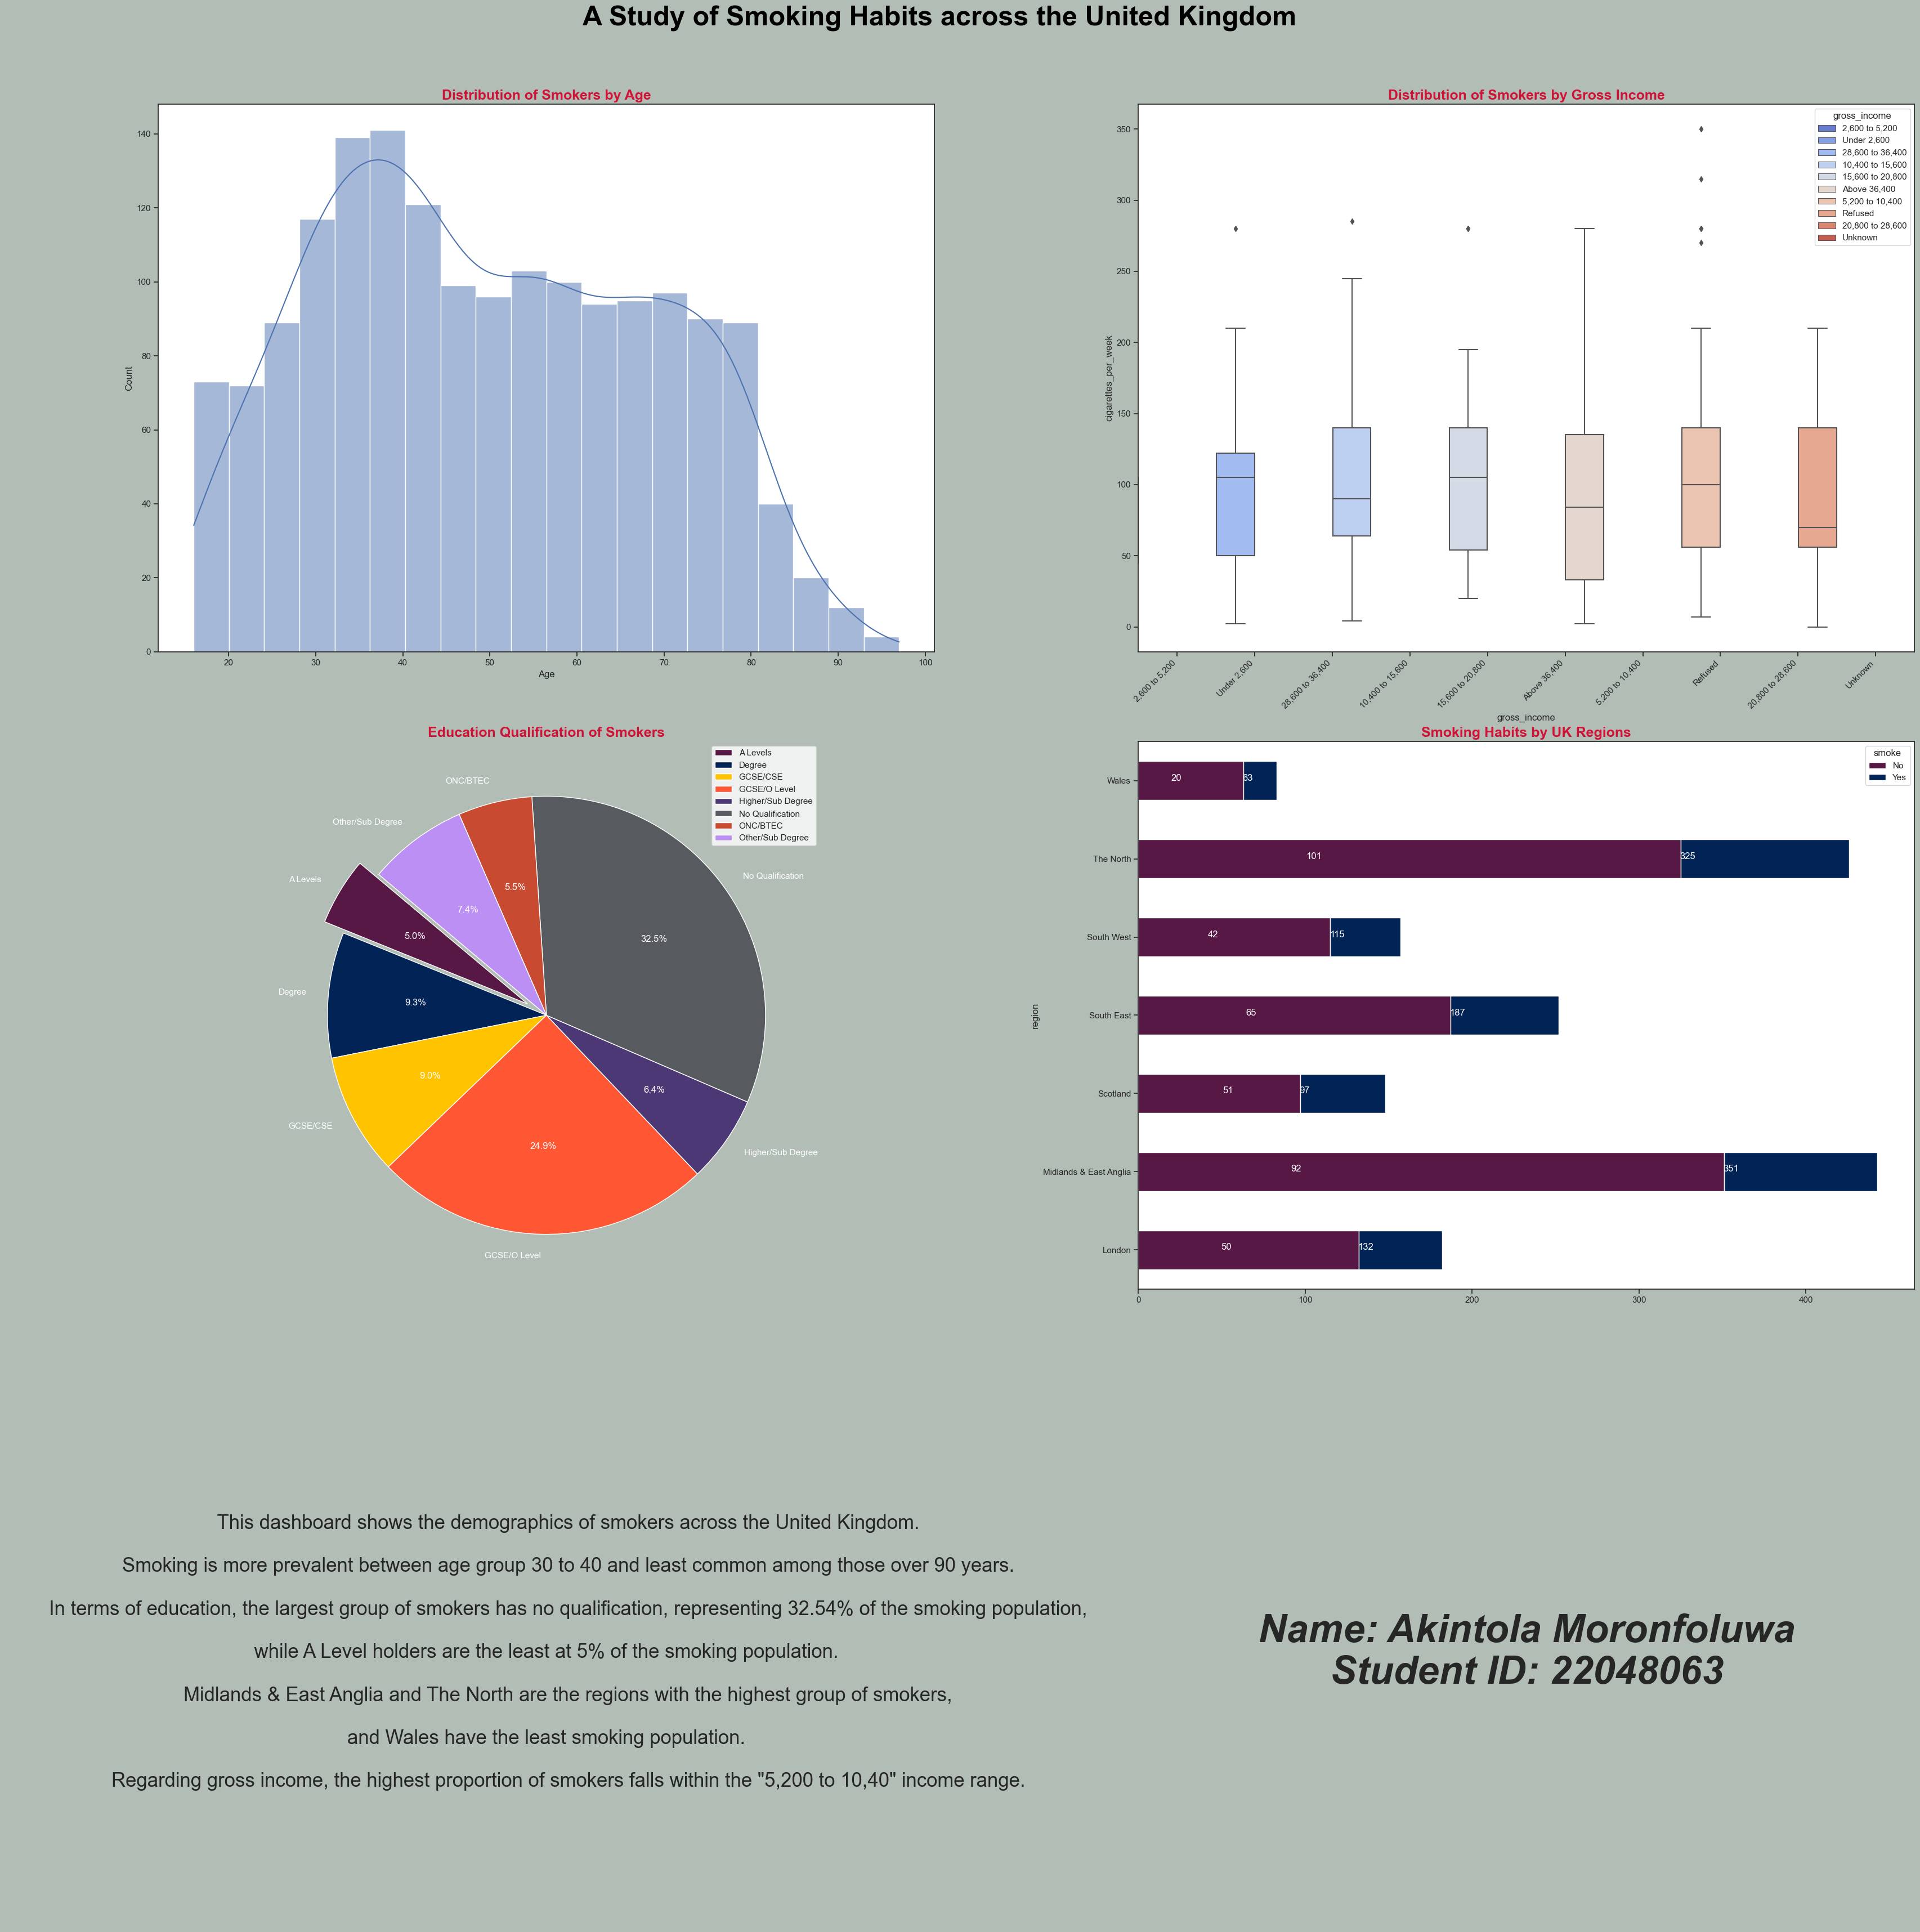

In [135]:
#!/usr/bin/python3

"""
    Name: Akintola Moronfoluwa
    Student Id: 22048063
    Github repo: https://github.com/Foluwa/7PAM2004_assigment_infographics
    Datasets: https://www.kaggle.com/datasets/utkarshx27/smoking-dataset-from-uk
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def plot_distribution(df, ax):
    """ Plot 1 - Bar Plot """
    sns.histplot(df['age'], bins=20, kde=True, ax=ax)
    
    # Set the  and labels
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')
    return ax

def plot_box_plot(df, ax):
    """ Plot 2 - Box Plot """
    df['amt_weekends'] = pd.to_numeric(df['amt_weekends'], errors='coerce')
    df['amt_weekdays'] = pd.to_numeric(df['amt_weekdays'], errors='coerce')
    df['cigarettes_per_week'] = df['amt_weekends'] * 2 + df['amt_weekdays'] * 5

    ax.set_title('Distribution of Smokers by Gross Income', weight='bold', size=18)

    # Create the box plots without a grid
    sns.set_context("talk")
    sns.set(style='ticks')
    sns.boxplot(x="gross_income", 
                y="cigarettes_per_week", hue="gross_income", data=df, palette="coolwarm", ax=ax, width=5)
    
    # Rotate the text on the x-axis
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
    return ax

def plot_pie_chart(df, ax):
    """ Plot 3 - Pie Chart """ 
    qualifications = df.groupby(['highest_qualification', 'smoke']).size().unstack().fillna(0)
    labels = qualifications.index
    num_qualifications = len(qualifications.index)

    # Define colors, labels, and explode
    explode = tuple([0.1] + [0]*(num_qualifications-1))
    labels = qualifications.index

    ax.set_title('Education Qualification of Smokers', weight='bold', size=18)

    # Pie chart for smokers
    p1 = ax.pie(qualifications['Yes'], labels=labels, autopct='%1.1f%%',
                startangle=140, colors=colors, explode=explode, textprops={'color':'white'})
    ax.set_title('Highest Qualification of Smokers')

    # Adding legend to the top right corner
    ax.legend(p1[0], labels, loc='upper right')
    return ax


# Refactored function
def plot_horizontal_bar(df, ax):
    
    """ Plot 4 - Horizontal Bar Plot  """
    smoke_by_region = df.groupby(['region', 'smoke']).size().unstack().fillna(0)
    smoke_by_region.plot(ax=ax, kind='barh', stacked=True, color=colors)
    for i, v in enumerate(smoke_by_region.columns):
        totals = smoke_by_region.iloc[:, i]
        for j in range(len(totals)):
            ax.text(totals.iloc[j] - 0.5, j, str(totals.iloc[j]), color='w')
    return ax


def chart_desc(ax):
    """ Explanation of chart """
    
    description = (
        """
        This dashboard shows the demographics of smokers across the United Kingdom.\n
        Smoking is more prevalent between age group 30 to 40 and least common among those over 90 years.\n
        In terms of education, the largest group of smokers has no qualification, representing 32.54% of the smoking population,
        \n while A Level holders are the least at 5% of the smoking population. \n
        Midlands & East Anglia and The North are the regions with the highest group of smokers,
        \nand Wales have the least smoking population.\n
        Regarding gross income, the highest proportion of smokers falls within the "5,200 to 10,40" income range.
        """
    )

    # Remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Remove ticks
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_frame_on(False)
    
    
    # Add a subplot without a border
    # ax = fig.add_subplot(gs[2, 0])
    ax.axis('off')
    ax.text(0.5, 0.5, description, ha='center', va='center', fontsize=25)
    return ax
    

def student_details(ax):
    """ Explanation of chart """
    
    ax.axis('off')
    
    # Remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
        
    ax.set_frame_on(False)

    # Add student information
    student_info = 'Name: Akintola Moronfoluwa\nStudent ID: 22048063'
    ax.text(0.5, 0.5, student_info, ha='center', va='center', fontsize=50, style='italic', weight='bold')
    return ax

if __name__ == "__main__":

    # Load data from CSV
    df = pd.read_csv('./smoking.csv')

    # Define details and colors
    title_params = {'weight': 'bold', 'size': 35, 'color': '#000000'}
    subtitle_params = {'weight': 'bold', 'size': 18, 'color': '#D01237'}
    colors = ['#581845', '#022356', '#FFC300', '#FF5733', '#4B3874', 
              '#575A5F', '#C84A30', '#BC8FF5', '#0BA2E8', '#386174']

    # Create chart figure and axes
    fig = plt.figure(figsize=(35, 35))
    
    # Initialize the grid layout
    gs = GridSpec(3, 2, figure=fig)

    # Assign Axes
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, 0])
    ax6 = fig.add_subplot(gs[2, 1])

    # Plot charts in order
    plot_distribution(df, ax1)
    plot_box_plot(df, ax2)
    plot_pie_chart(df, ax3)
    plot_horizontal_bar(df, ax4)
    chart_desc(ax5)
    student_details(ax6)

    # Set titles for each chart
    ax1.set_title('Distribution of Smokers by Age', **subtitle_params)  
    ax2.set_title('Distribution of Smokers by Gross Income', **subtitle_params)
    ax3.set_title('Education Qualification of Smokers',**subtitle_params)
    ax4.set_title('Smoking Habits by UK Regions', **subtitle_params)

    #  Adjust layout
    plt.tight_layout()
    
    plt.subplots_adjust(top=0.93)

    # Set a title for the entire figure
    fig.suptitle('A Study of Smoking Habits across the United Kingdom', **title_params)

    # Set the background color
    fig.set_facecolor('#B2BEB5')
    
    # Save infographics Visualisation in PNG format, 300 dpi
    fig.savefig('22048063.png', format='png', dpi=300)